# Graph
wx + b = z

![caption](img/snn1.png)

In [1]:
import numpy as np
import tensorflow as tf

In [31]:
np.random.seed(101)
tf.set_random_seed(101)

In [32]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [33]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [34]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [35]:
add_op = a + b
mul_op = a * b

In [42]:
with tf.Session() as sess:
    mul_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})

In [43]:
print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [44]:
print(mul_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# SNN

In [47]:
n_features = 10
n_dense_neurons = 3

In [48]:
x = tf.placeholder(tf.float32, (None, n_features))

In [49]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

b = tf.Variable(tf.ones([n_dense_neurons]))

In [50]:
xW = tf.matmul(x, W)

In [51]:
z = tf.add(xW, b)

In [52]:
a = tf.sigmoid(z)

In [53]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [57]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


## Regression

In [87]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [88]:
x_data

array([ 1.2458498 , -0.12651872,  3.28609338,  2.64173202,  4.50240075,
        5.66148424,  7.77782527,  6.36934922, 10.07519565,  8.79945347])

In [89]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [90]:
y_label

array([ 1.09440812,  2.3475695 ,  3.03387501,  1.93887702,  4.01282531,
        5.93225895,  5.57526444,  8.74994412,  7.39202106, 10.58618234])

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

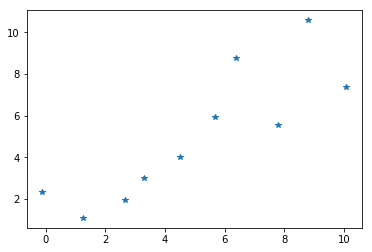

In [92]:
plt.plot(x_data, y_label, "*")

y = mx + b

In [93]:
np.random.rand(2)

array([0.56493547, 0.21314386])

In [94]:
m = tf.Variable(0.48)
b = tf.Variable(0.32)

In [95]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y - y_hat)**2

In [96]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [97]:
init = tf.global_variables_initializer()

In [98]:
with tf.Session() as sess:
    sess.run(init)
    trainning_steps = 1
    for i in range(trainning_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m, b])
    
print(final_slope, final_intercept)

0.77931416 0.3667029


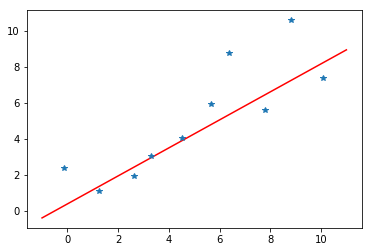

In [99]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*')